# House Prices - Advanced Regression Techniques (Kaggle Competition)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline

In [2]:
# load data
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train.info() # 1460 entries, 81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe().T # numerical feature summary

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
df_train.describe(include="O").T # categorical feature summary

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [6]:
# univariate analysis
from pandas.api.types import is_string_dtype, is_numeric_dtype

def num_cat_var(df):
    """create lists of numerical and categorical features"""
    num_var = []
    cat_var = []

    for column in df:
        if is_numeric_dtype(df[column]):
            num_var.append(column)
        else:
            cat_var.append(column)

    print("numerical:".upper(), num_var, "-", len(num_var), "\n")
    print("categorical:".upper(), cat_var, "-", len(cat_var))

    return num_var, cat_var

num_var, cat_var = num_cat_var(df_train)

NUMERICAL: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] - 38 

CATEGORICAL: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Gar

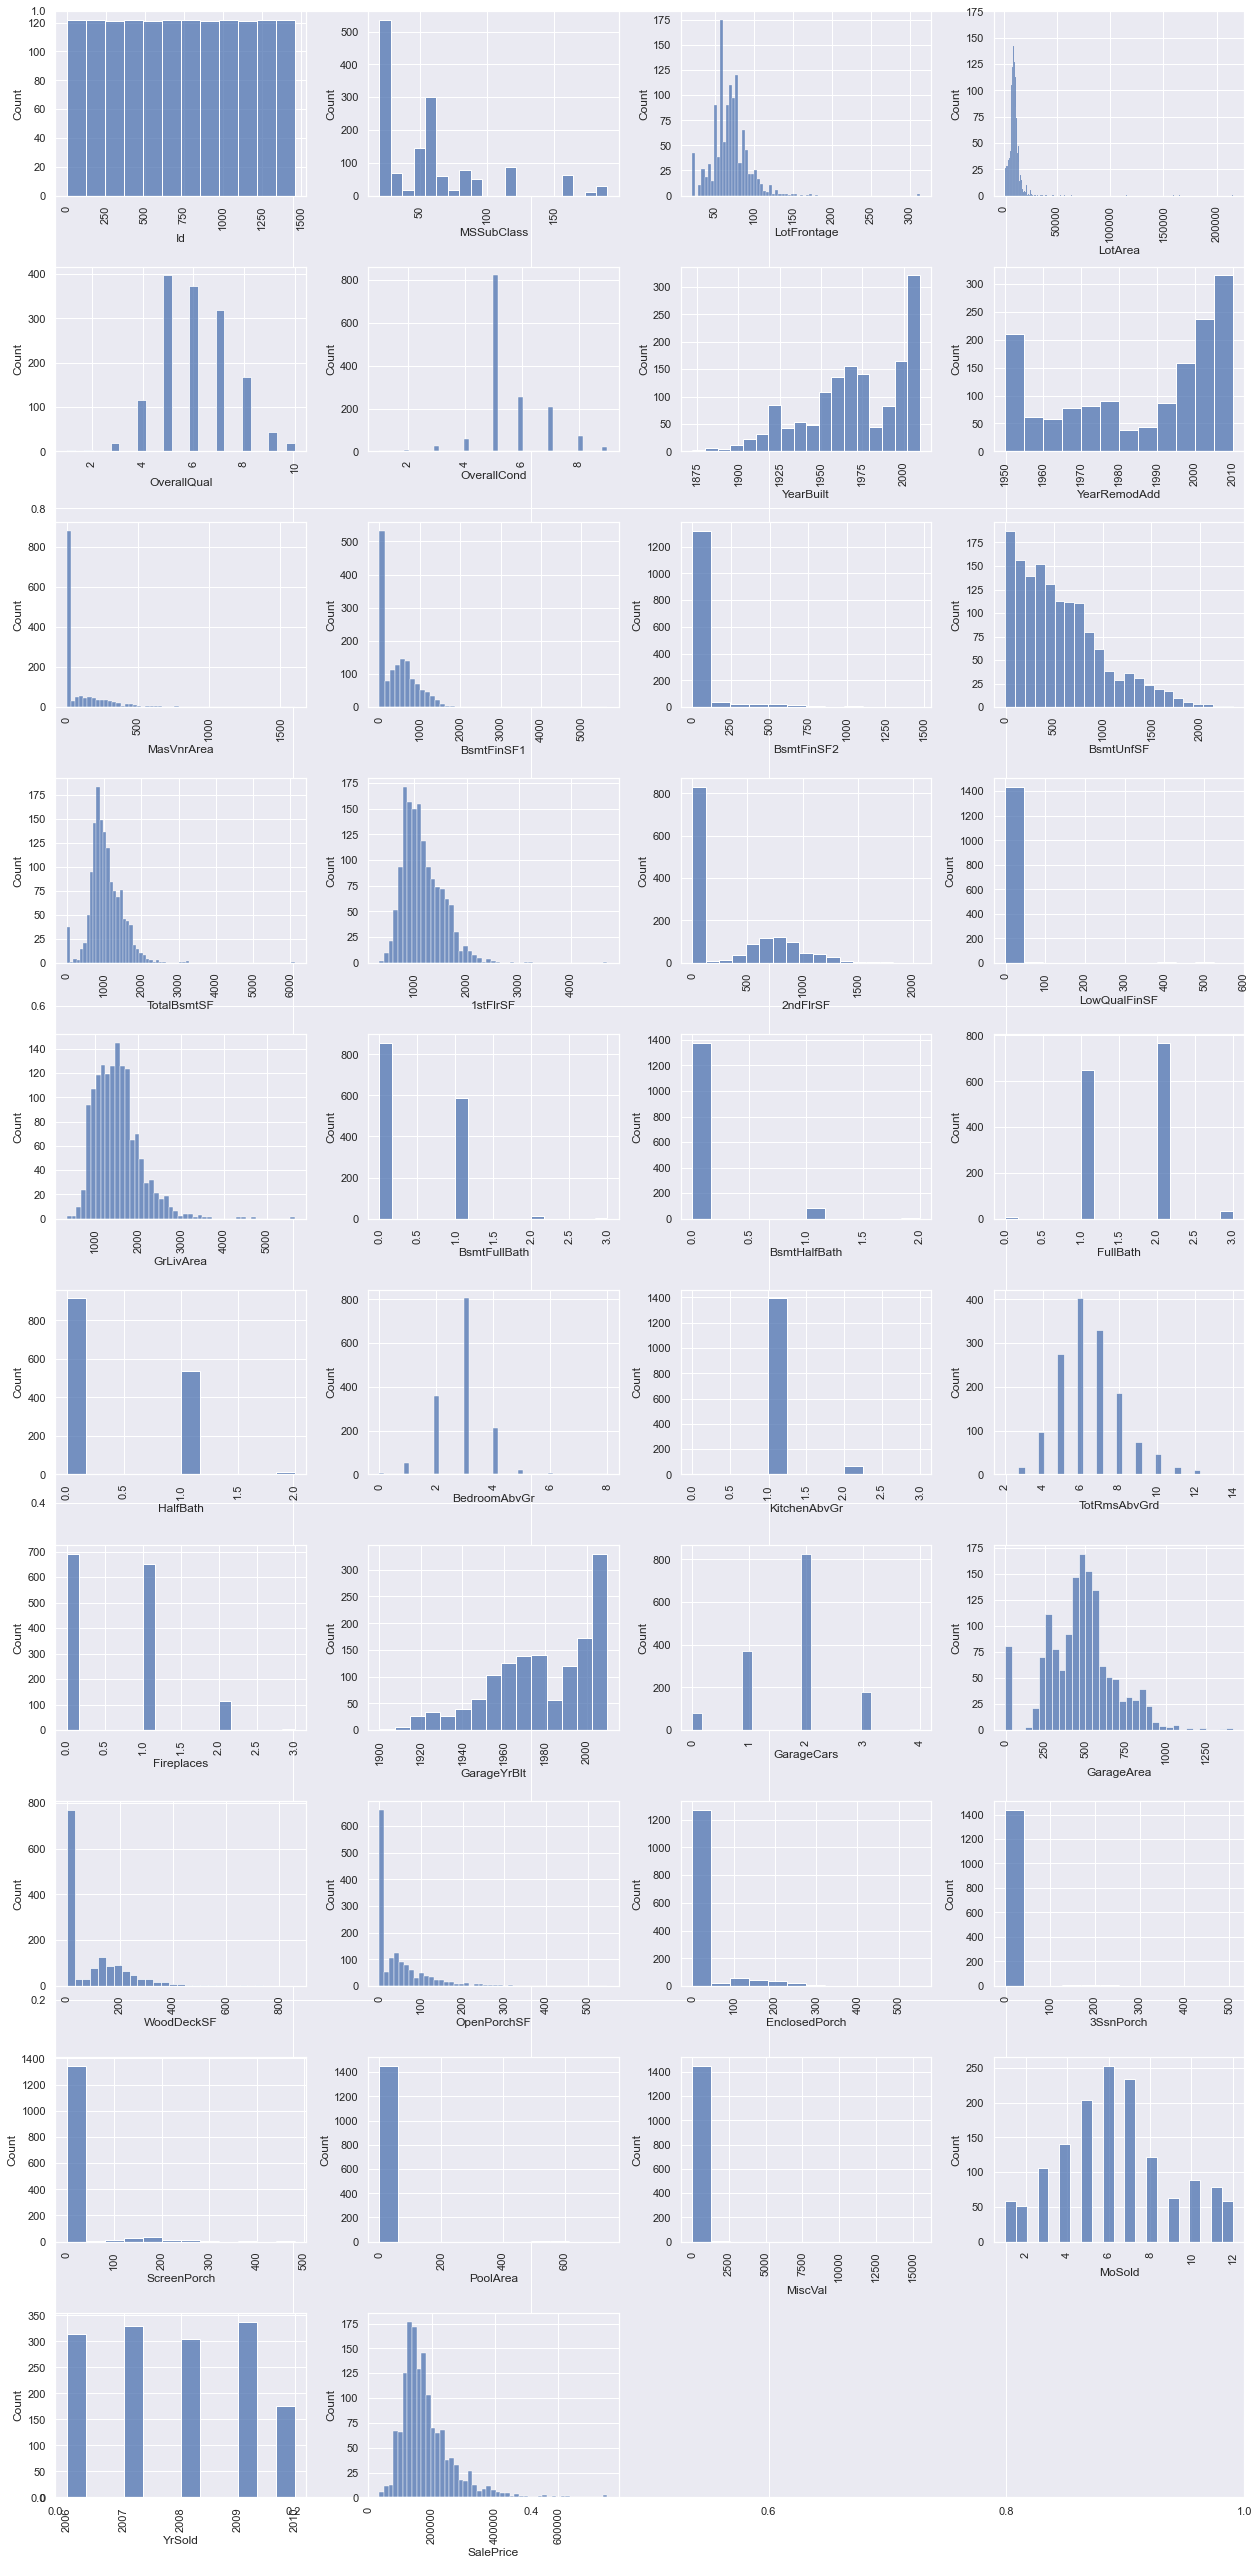

In [7]:
# histograms of numerical features
fig, ax = plt.subplots(figsize=(18, 36))

for i, var in enumerate(num_var):
    sub = fig.add_subplot(10, 4, i+1)
    sub.set_xlabel(var)
    sns.histplot(df_train[var])
    plt.xticks(rotation=90)

fig.tight_layout()

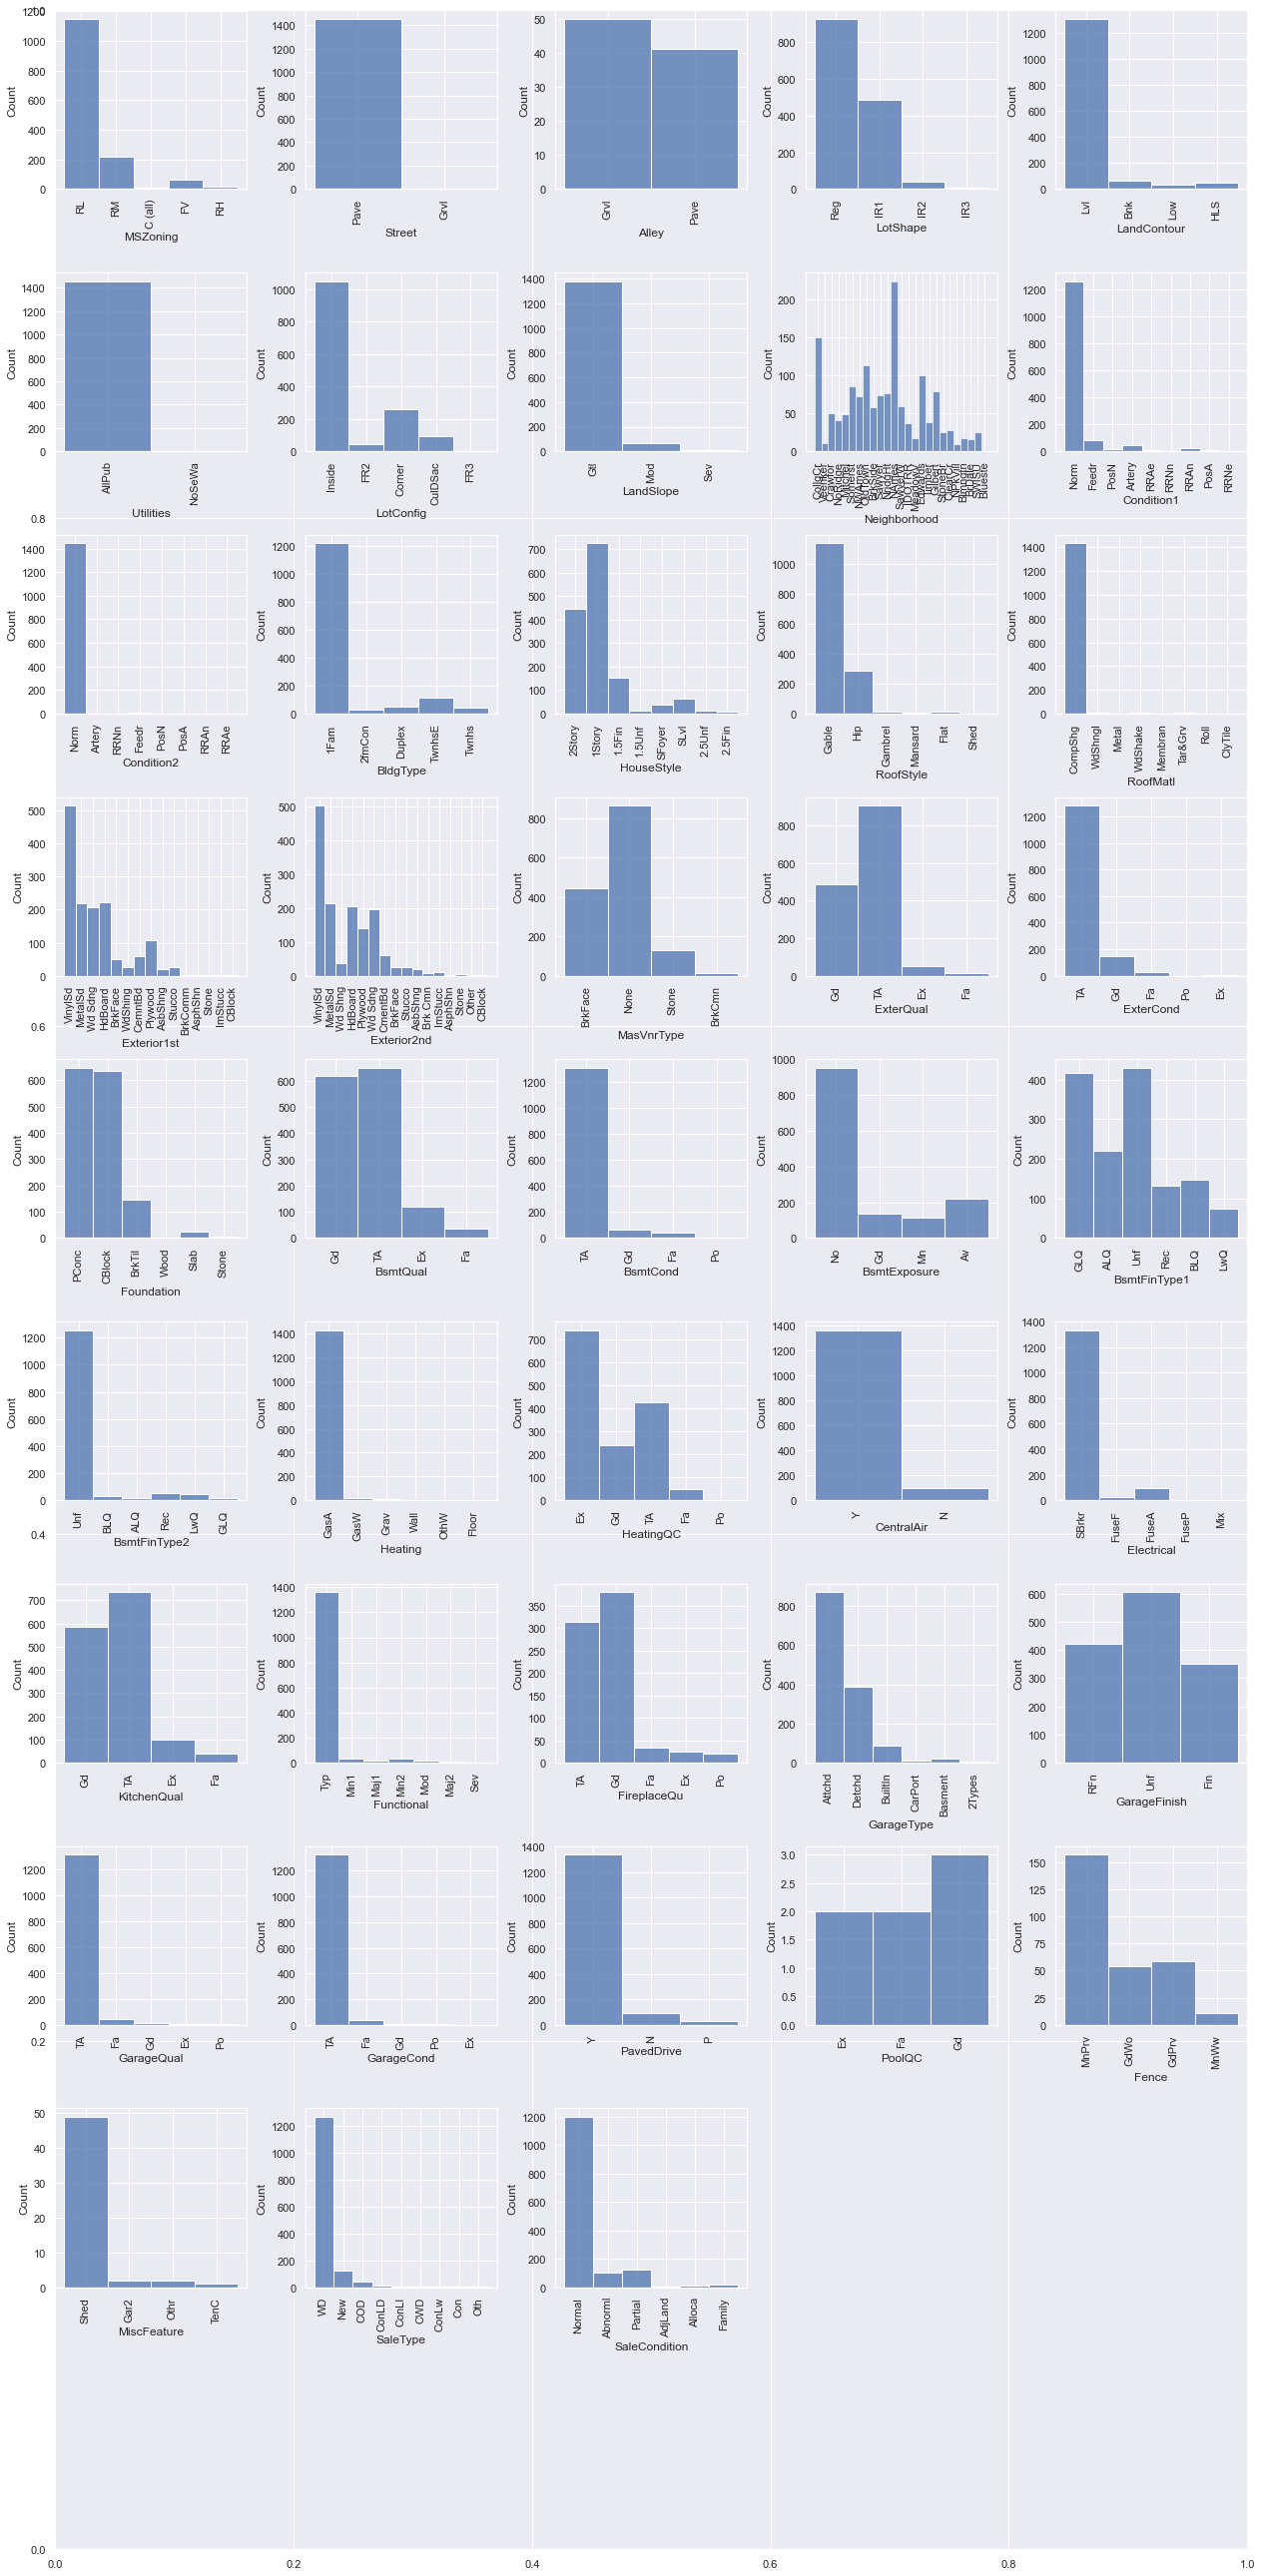

In [8]:
# histograms of categorical features
fig, ax = plt.subplots(figsize=(18, 36))

for i, var in enumerate(cat_var):
    sub = fig.add_subplot(10, 5, i+1)
    sub.set_xlabel(var)
    sns.histplot(df_train[var])
    plt.xticks(rotation=90)

fig.tight_layout()

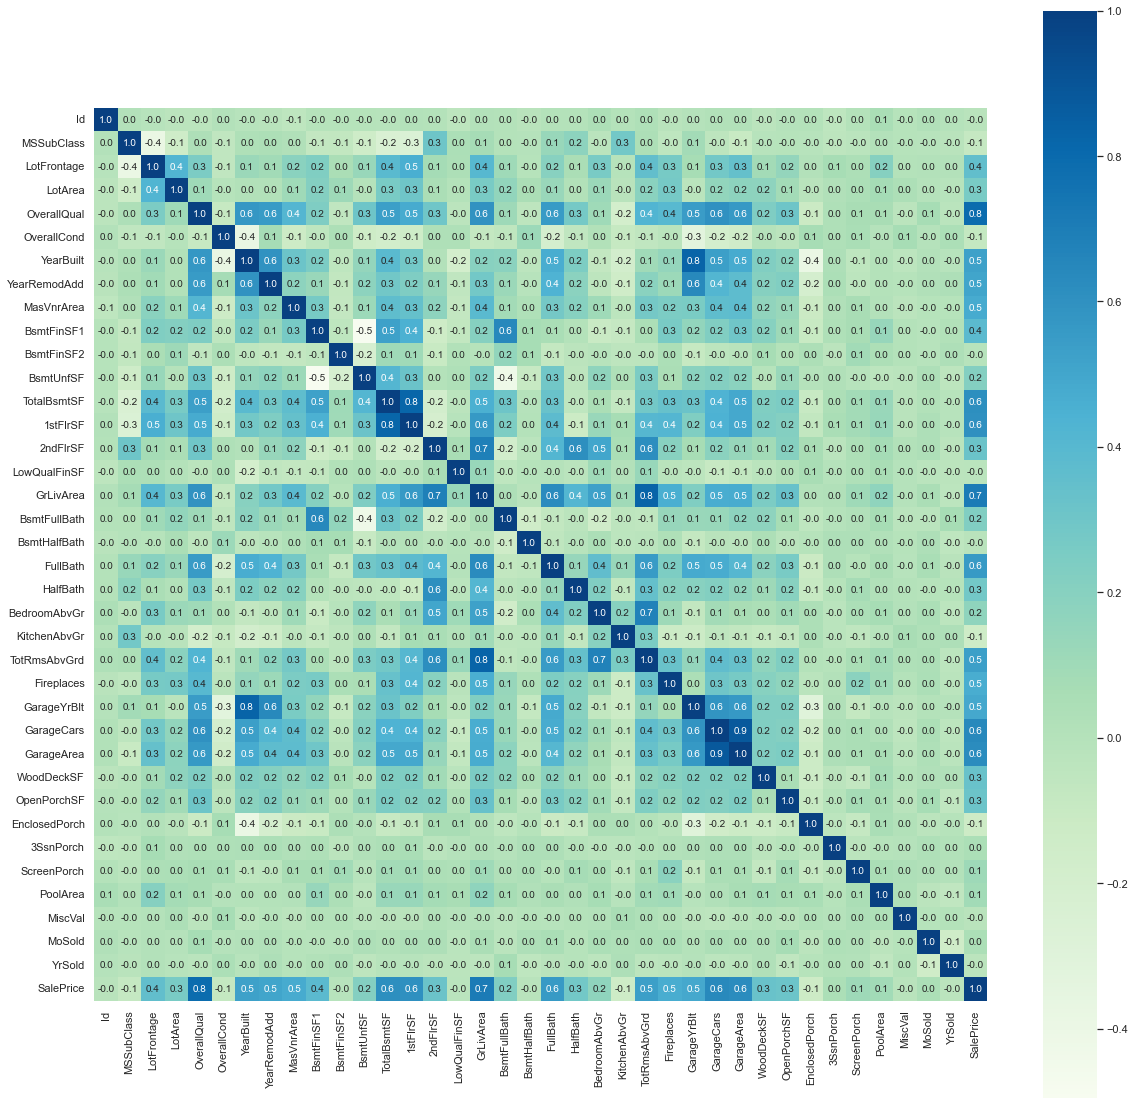

In [9]:
# correlation matrix with heatmap
corrmat = df_train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
g = sns.heatmap(corrmat, cmap="GnBu", annot=True, fmt=".1f", square=True)

In [10]:
k = 20

top10 = corrmat.nlargest(k, "SalePrice").index
top10_val = list(corrmat["SalePrice"].sort_values(ascending=False)[:k])

for var, val in zip(top10, top10_val):
    print(var + f": {val}")

SalePrice: 1.0
OverallQual: 0.7909816005838053
GrLivArea: 0.7086244776126515
GarageCars: 0.6404091972583519
GarageArea: 0.6234314389183622
TotalBsmtSF: 0.6135805515591943
1stFlrSF: 0.6058521846919153
FullBath: 0.5606637627484453
TotRmsAbvGrd: 0.5337231555820284
YearBuilt: 0.5228973328794967
YearRemodAdd: 0.5071009671113866
GarageYrBlt: 0.4863616774878596
MasVnrArea: 0.47749304709571444
Fireplaces: 0.46692883675152763
BsmtFinSF1: 0.3864198062421535
LotFrontage: 0.35179909657067737
WoodDeckSF: 0.32441344456812926
2ndFlrSF: 0.31933380283206736
OpenPorchSF: 0.31585622711605504
HalfBath: 0.28410767559478256


In [11]:
# columns to remove (collinearity)
# GarageYrBlt / TotRmsAbvGrd / 1stFlrSF / GarageArea
df_train.drop(["GarageYrBlt", "TotRmsAbvGrd", "1stFlrSF", "GarageArea"], axis=1, inplace=True)
df_test.drop(["GarageYrBlt", "TotRmsAbvGrd", "1stFlrSF", "GarageArea"], axis=1, inplace=True)


In [12]:
pd.options.display.max_rows = 100

display(len(df_train)) # 1460 houses
display(df_train.isnull().sum()) # remove if missing more than 50% and not important

# columns to remove
# Alley / PoolQC / Fence / MiscFeature / FireplaceQu

df_train.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis=1, inplace=True)
df_test.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis=1, inplace=True)


1460

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [13]:
display(df_train.isnull().sum().sort_values(ascending=False))

LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
KitchenAbvGr       0
FullBath           0
HalfBath           0
BsmtHalfBath       0
BsmtFullBath       0
BedroomAbvGr       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
Id                 0
KitchenQual        0
ScreenPorch        0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
3SsnPorch          0
Functional         0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCars         0
CentralAir         0
Fireplaces         0
BsmtUnfSF          0
HeatingQC          0
OverallQual        0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour  

In [14]:
# remove Garage-X features (GarageCars dictates garage-related features)
# remove Bsmt-X features (TotalBsmtSF dictates basement-related features)

df_train.drop(["GarageType", "GarageFinish", "GarageQual", "GarageCond"], axis=1, inplace=True)
df_test.drop(["GarageType", "GarageFinish", "GarageQual", "GarageCond"], axis=1, inplace=True)

df_train.drop(["BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1"], axis=1, inplace=True)
df_test.drop(["BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1"], axis=1, inplace=True)

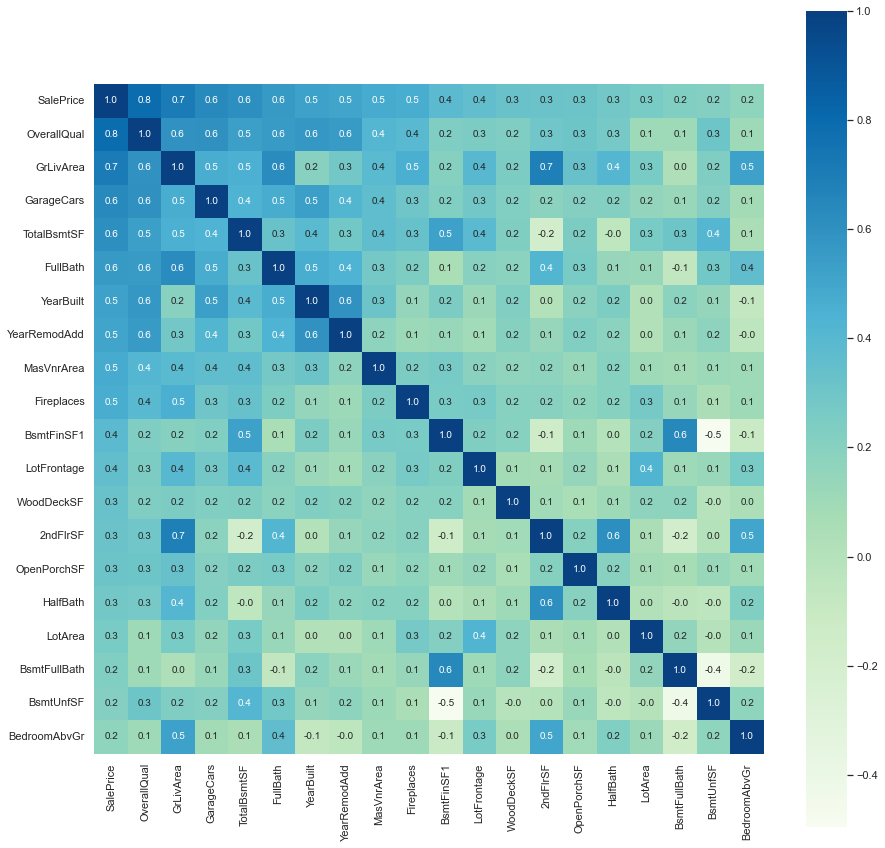

In [15]:
# re-plot correlation matrix heatmap (numerical features)
corrmat = df_train.corr()
top10 = corrmat.nlargest(20, "SalePrice").index

plt.figure(figsize=(15,15))
sns.heatmap(df_train[top10].corr(), cmap="GnBu", annot=True, fmt=".1f", square=True);

In [16]:
# remove collinearity features
# 2ndFlrSF / BsmtFinSF1 / BsmtFinSF2 / BsmtUnfSF / BsmtFullBath / BsmtHalfBath

df_train.drop(["2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)
df_test.drop(["2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)

In [17]:
# drop "Id" column
df_train.drop(["Id"], axis=1, inplace=True)
df_test.drop(["Id"], axis=1, inplace=True)

In [18]:
# update numerical / categorical features

num_var, cat_var = num_cat_var(df_train)

NUMERICAL: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] - 27 

CATEGORICAL: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'] - 29


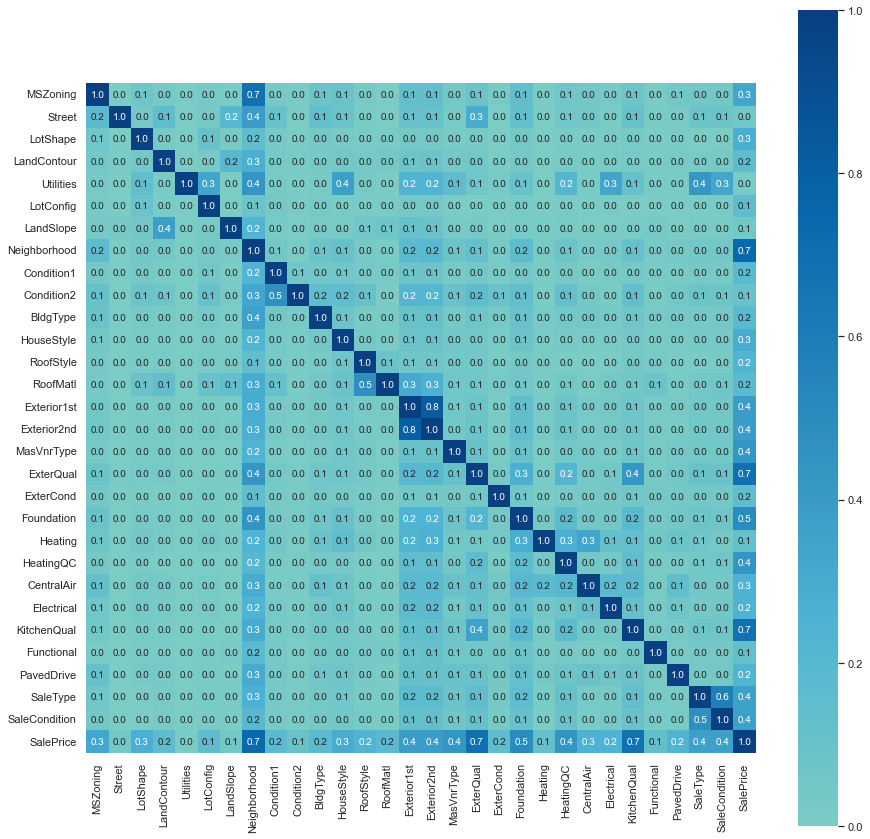

In [19]:
# categorical features correlation matrix (dython)
# Gramer's V with Theil's U uncertainty coefficient
from dython.nominal import associations

cat_var_corr = associations(pd.concat([df_train[cat_var], df_train["SalePrice"]], axis=1),
            nom_nom_assoc="theil", cmap="GnBu", annot=True, fmt=".1f", figsize=(15,15));

In [20]:
cat_var_corr = cat_var_corr["corr"]

k = 20

top10 = cat_var_corr.nlargest(k, "SalePrice").index
top10_val = list(cat_var_corr["SalePrice"].sort_values(ascending=False)[:k])

for var, val in zip(top10, top10_val):
    print(var + f": {val}")

SalePrice: 1.0
Neighborhood: 0.7386304832658636
ExterQual: 0.6909325420958304
KitchenQual: 0.6757208184187744
Foundation: 0.5063283534727419
HeatingQC: 0.442154368790011
MasVnrType: 0.43453711043076526
Exterior2nd: 0.39221149922589343
Exterior1st: 0.3908620257099605
SaleType: 0.37052326104924094
SaleCondition: 0.36809981916689516
MSZoning: 0.3279629299879021
HouseStyle: 0.2937901075671953
LotShape: 0.2763615521925143
CentralAir: 0.251328163840155
Electrical: 0.24431835801832044
RoofStyle: 0.2402012284068327
PavedDrive: 0.23353742383318005
BldgType: 0.18583333094140705
Condition1: 0.1806395304453634


In [21]:
# features to remove (collinearity)
# Exterior1st / MSZoning

df_train.drop(["Exterior1st", "MSZoning"], axis=1, inplace=True)
df_test.drop(["Exterior1st", "MSZoning"], axis=1, inplace=True)

In [22]:
# handling null-values (df_train)
df_train.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage    259
MasVnrArea       8
MasVnrType       8
Electrical       1
CentralAir       0
dtype: int64

In [23]:
# df_train["LotFrontage"].describe()
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(), inplace=True)

In [24]:
# df_train["MasVnrType"].value_counts()
df_train["MasVnrType"].fillna(df_train["MasVnrType"].mode()[0], inplace=True)

In [25]:
# df_train["MasVnrArea"].describe()
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)

In [26]:
# df_train["Electrical"].value_counts()
df_train["Electrical"].fillna(df_train["Electrical"].mode()[0], inplace=True)

In [27]:
df_train.isnull().sum().sort_values(ascending=False)[:5]

MSSubClass      0
GarageCars      0
CentralAir      0
Electrical      0
LowQualFinSF    0
dtype: int64

In [28]:
# handling null-values (df_test)
df_test.isnull().sum().sort_values(ascending=False)[:20]

LotFrontage      227
MasVnrType        16
MasVnrArea        15
Functional         2
Utilities          2
TotalBsmtSF        1
Exterior2nd        1
KitchenQual        1
GarageCars         1
SaleType           1
3SsnPorch          0
EnclosedPorch      0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
YrSold             0
MoSold             0
MiscVal            0
BedroomAbvGr       0
dtype: int64

In [29]:
# df_test["LotFrontage"].describe()
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(), inplace=True)

In [30]:
# df_test["MasVnrType"].value_counts()
df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0], inplace=True)

In [31]:
# df_test["MasVnrArea"].describe()
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)

In [32]:
df_test.isnull().sum().sort_values(ascending=False)[:10]

Utilities       2
Functional      2
TotalBsmtSF     1
SaleType        1
Exterior2nd     1
KitchenQual     1
GarageCars      1
Fireplaces      0
Electrical      0
LowQualFinSF    0
dtype: int64

In [33]:
df_test["Utilities"].fillna(df_test["Utilities"].mode()[0], inplace=True)
df_test["Functional"].fillna(df_test["Functional"].mode()[0], inplace=True)
df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].mean(), inplace=True)
df_test["SaleType"].fillna(df_test["SaleType"].mode()[0], inplace=True)
df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0], inplace=True)
df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0], inplace=True)
df_test["GarageCars"].fillna(df_test["GarageCars"].mean(), inplace=True)

In [34]:
display(df_test.isnull().sum().sort_values(ascending=False)[:5])

MSSubClass      0
Heating         0
CentralAir      0
Electrical      0
LowQualFinSF    0
dtype: int64

In [35]:
df_test.shape

(1459, 53)

# DATA CLEANSING CHECK POINT

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


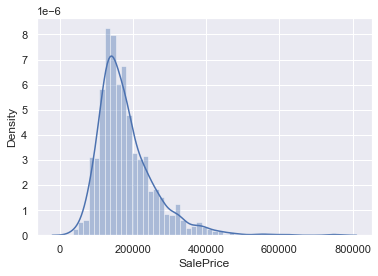

In [36]:
# target (dependenet variable)
sns.distplot(df_train["SalePrice"]);

print("skewness:", df_train["SalePrice"].skew())
print("kurtosis:", df_train["SalePrice"].kurt())

In [37]:
methods = [np.log, np.sqrt] # log transformation

for method in methods:
    print(method)
    print("skewness:", method(df_train["SalePrice"]).skew())
    print("kurtosis:", method(df_train["SalePrice"]).kurt())

<ufunc 'log'>
skewness: 0.12133506220520406
kurtosis: 0.8095319958036296
<ufunc 'sqrt'>
skewness: 0.9431527373310963
kurtosis: 1.9578038790969754


In [38]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

In [39]:
# top 5 numerical features
# OverallQual: 0.7909816005838053
# GrLivArea: 0.7086244776126515
# GarageCars: 0.6404091972583519
# GarageArea: 0.6234314389183622
# TotalBsmtSF: 0.6135805515591943

# top 5 categogrical features
# Neighborhood: 0.7386304832658636
# ExterQual: 0.6909325420958304
# KitchenQual: 0.6757208184187744
# Foundation: 0.5063283534727419
# HeatingQC: 0.442154368790011

k=6
top_num = corrmat.nlargest(k, "SalePrice").index
top_cat = cat_var_corr.nlargest(k, "SalePrice").index

top_features = set(list(top_num) + list(top_cat))
top_features.remove("SalePrice")
top_features = list(top_features)
top_features

['GrLivArea',
 'TotalBsmtSF',
 'Neighborhood',
 'GarageCars',
 'HeatingQC',
 'Foundation',
 'OverallQual',
 'FullBath',
 'ExterQual',
 'KitchenQual']

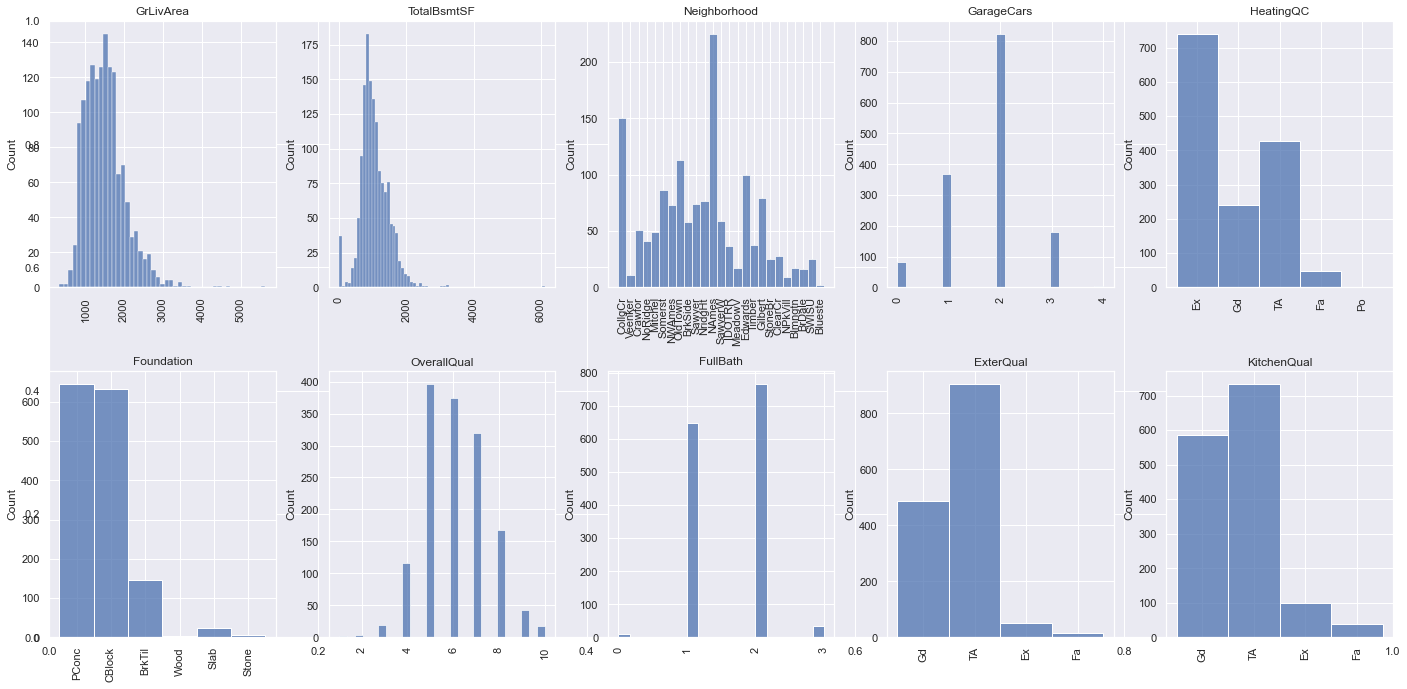

In [40]:
# univariate analysis (top 10 features)
fig, ax = plt.subplots(figsize=(20, 10))

for ind, feature in enumerate(top_features):
    sub = fig.add_subplot(2, 5, ind+1)
    g = sns.histplot(df_train[feature])
    plt.title(feature)
    plt.xlabel("")
    plt.xticks(rotation=90)

plt.tight_layout()


In [41]:
# TotalBsmtSF == 0 (houses with no basement)
df_train["HasBsmt"] = 0
df_train.loc[df_train["TotalBsmtSF"] > 0, "HasBsmt"] = 1

In [42]:
df_test["HasBsmt"] = 0
df_test.loc[df_test["TotalBsmtSF"] > 0, "HasBsmt"] = 1

In [43]:
# apply log transformation
df_train.loc[df_train["HasBsmt"] == 1, "TotalBsmtSF"] = np.log(df_train["TotalBsmtSF"])
df_test.loc[df_test["HasBsmt"] == 1, "TotalBsmtSF"] = np.log(df_test["TotalBsmtSF"])

skewness: -0.27581597237350997
kurtosis: 1.9346775731369186


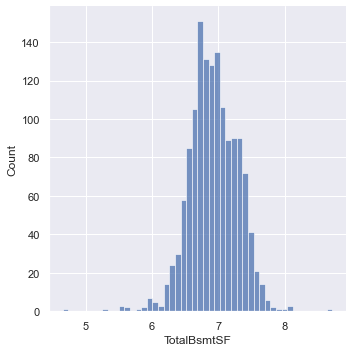

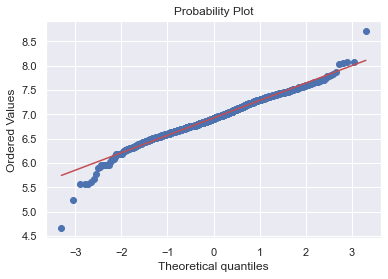

In [44]:
from scipy import stats

sns.displot(df_train.loc[df_train["HasBsmt"]== 1, "TotalBsmtSF"]);

fig = plt.figure()
stats.probplot(df_train.loc[df_train["HasBsmt"]== 1, "TotalBsmtSF"], plot=plt)

print("skewness:", df_train.loc[df_train["HasBsmt"]== 1, "TotalBsmtSF"].skew())
print("kurtosis:", df_train.loc[df_train["HasBsmt"]== 1, "TotalBsmtSF"].kurt())

In [45]:
df_train.drop(["HasBsmt"], axis=1, inplace=True)
df_test.drop(["HasBsmt"], axis=1, inplace=True)

skewness: -0.006995182187690808
kurtosis: 0.28260268850118564


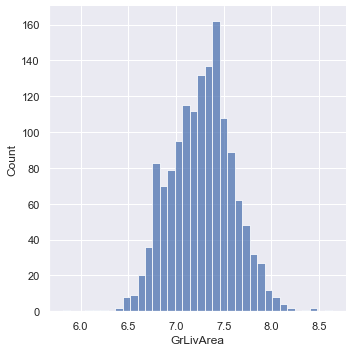

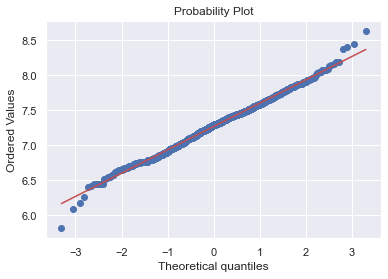

In [46]:
# apply transformation (GrLivArea)
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

sns.displot(df_train["GrLivArea"]);

fig = plt.figure()
stats.probplot(df_train["GrLivArea"], plot=plt)

print("skewness:", df_train["GrLivArea"].skew())
print("kurtosis:", df_train["GrLivArea"].kurt())

In [47]:
display(df_train.head())
display(df_test.head())

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


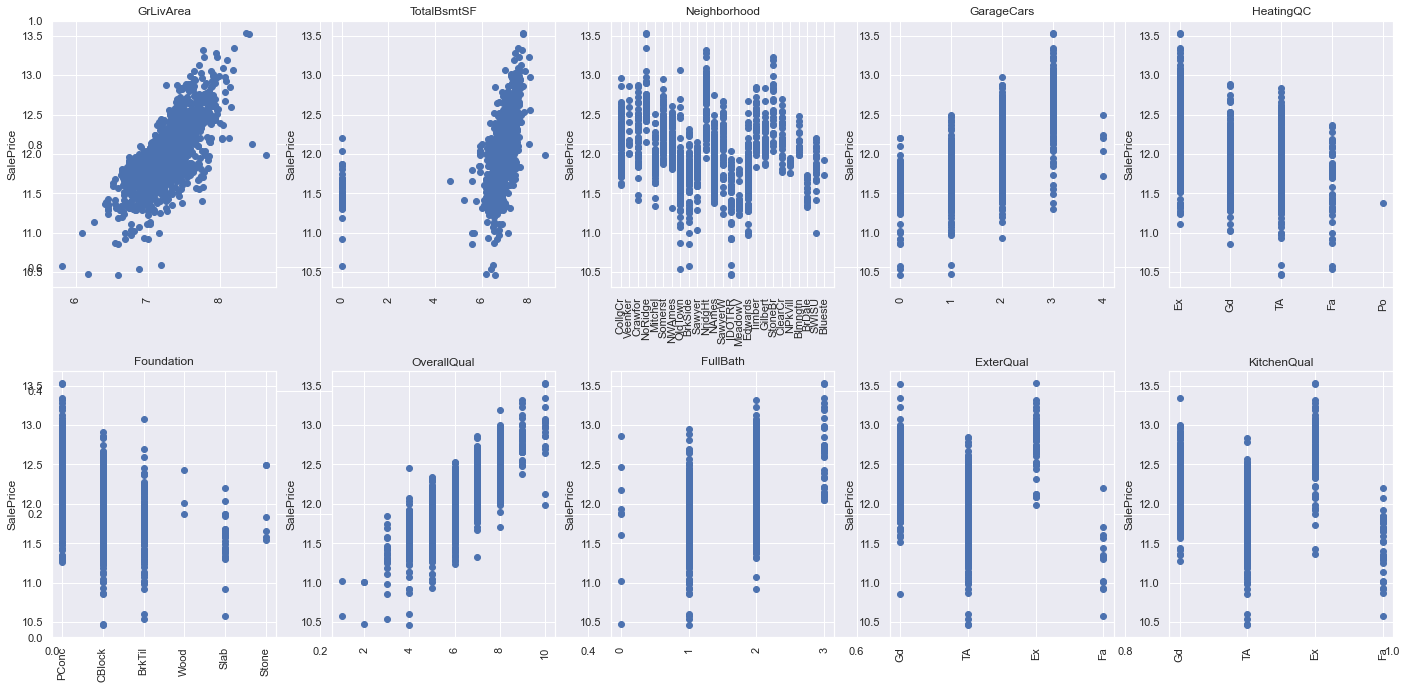

In [48]:
# bivariate analysis (with respect to SalePrice)
fig, ax = plt.subplots(figsize=(20, 10))

for ind, feature in enumerate(top_features):
    sub = fig.add_subplot(2, 5, ind+1)
    plt.scatter(x=df_train[feature], y=df_train["SalePrice"])
    plt.title(feature)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)

fig.tight_layout()

In [49]:
# GrLivArea outliers
display(df_train["GrLivArea"].argsort()[-2:])

display(df_train.loc[523, "GrLivArea"], df_train.loc[1298, "GrLivArea"])

1458     523
1459    1298
Name: GrLivArea, dtype: int64

8.450198322591959

8.637993891561942

In [50]:
# drop outliers
df_train.drop([523, 1298], inplace=True)

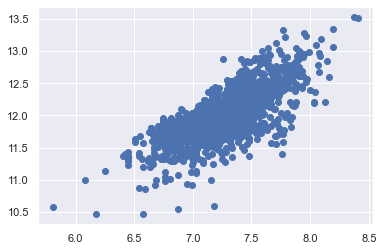

In [51]:
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"]);

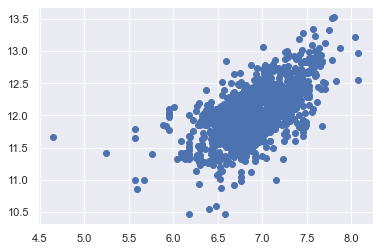

In [52]:
# TotalBsmtSF outliers
plt.scatter(df_train.loc[df_train["TotalBsmtSF"] > 0, "TotalBsmtSF"],
            df_train.loc[df_train["TotalBsmtSF"] > 0, "SalePrice"]);

In [53]:
display(df_train.loc[df_train["TotalBsmtSF"] > 0, "TotalBsmtSF"].argsort()[:2])
display(df_train.loc[df_train["TotalBsmtSF"] > 0].iloc[850].name)
display(df_train.loc[df_train["TotalBsmtSF"] > 0].iloc[483].name)

df_train.drop([872, 494], inplace=True)

0    850
1    483
Name: TotalBsmtSF, dtype: int64

872

494

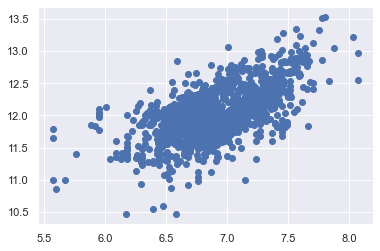

In [54]:
# TotalBsmtSF outliers
plt.scatter(df_train.loc[df_train["TotalBsmtSF"] > 0, "TotalBsmtSF"],
            df_train.loc[df_train["TotalBsmtSF"] > 0, "SalePrice"]);

# ML MODEL

In [55]:
num_var, cat_var = num_cat_var(df_train)

NUMERICAL: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] - 27 

CATEGORICAL: ['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'] - 27


In [56]:
display(df_train.shape, df_test.shape)

(1456, 54)

(1459, 53)

In [57]:
df_final = pd.concat([df_train, df_test], axis=0)
df_final.shape

(2915, 54)

In [58]:
# one hot encoding
df_final_ohe = pd.get_dummies(df_final, columns=cat_var)

In [59]:
display(df_final_ohe.shape)
display(df_final_ohe.head())

(2915, 197)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,6.752270,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,7.140453,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,6.824374,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,6.628041,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,7.043160,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
# split train-test data
df_Train = df_final_ohe.iloc[:1456, :]
df_Test = df_final_ohe.iloc[1456:, :]

In [61]:
df_Test.drop(["SalePrice"], axis=1, inplace=True)

In [62]:
display(df_Train.shape, df_Test.shape)

(1456, 197)

(1459, 196)

In [63]:
# split train data into X and y
X_train = df_Train.drop(["SalePrice"], axis=1)
y_train = df_Train["SalePrice"]

display(X_train.shape, y_train.shape)
display(X_train.head(), y_train.head())

(1456, 196)

(1456,)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,6.752270,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,7.140453,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,6.824374,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,6.628041,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,7.043160,0,...,0,0,0,1,0,0,0,0,1,0


0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [64]:
import xgboost
reg = xgboost.XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [65]:
import pickle
filename = "finalized_model.pkl"
pickle.dump(reg, open(filename, "wb"))

In [66]:
y_pred = reg.predict(df_Test)
y_pred[:10]

array([12.062575 , 12.293741 , 12.444646 , 12.502058 , 12.198207 ,
       12.291623 , 12.339874 , 12.424789 , 12.487609 , 11.8760195],
      dtype=float32)

In [67]:
# un-do log transformation
y_pred = 2.718281828459 ** y_pred
y_pred[:10]

array([173264.56, 218325.17, 253887.23, 268890.  , 198432.95, 217863.22,
       228633.12, 248895.66, 265032.72, 143777.05], dtype=float32)

In [68]:
df_submit = pd.read_csv("./data/sample_submission.csv")

y_pred = pd.DataFrame(y_pred)
results = pd.concat([df_submit["Id"], y_pred], axis=1)
results.columns = ["Id", "SalePrice"]

display(results.head())

,Id,SalePrice
0,1461,173264.562500
1,1462,218325.171875
2,1463,253887.234375
3,1464,268890.000000
4,1465,198432.953125


In [69]:
results.to_csv("house_prices_jimmy_son.csv", index=False)